4. Histogram (Distribution of a single variable)

Shows the frequency distribution of a single dataset.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D axes
import numpy as np
import random
import pandas as pd

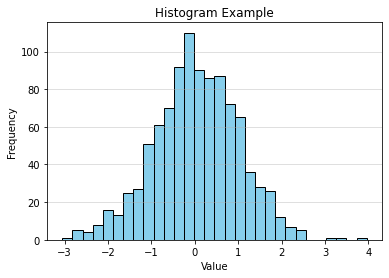

In [4]:
# Sample Data (Larger Dataset for distribution visualization)
np.random.seed(1)
data = np.random.randn(1000) # 1000 random numbers from a normal distribution

plt.hist(data, bins=30, color='skyblue', edgecolor='black') # bins for number of bars
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram Example")
plt.grid(axis='y', alpha=0.5) # Grid only on y-axis
plt.show()

Scenario: Imagine you are a teacher and you just gave a test to your class. You want to see how the scores are distributed. Are most students getting high scores, low scores, or are they spread out? A histogram can help you visualize this.

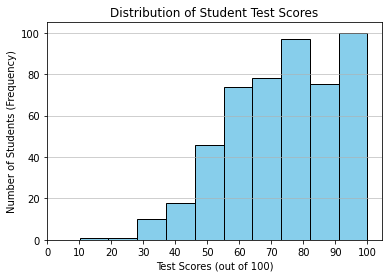

In [16]:
# Simulate test scores (out of 100) for 50 students
np.random.seed(42)  # for reproducibility
num_students = 500
average_score = 75
std_dev = 20  # Standard deviation to control the spread of scores

test_scores = np.random.normal(average_score, std_dev, num_students)
# Clip scores to be within the 0-100 range (realistic test scores)
test_scores = np.clip(test_scores, -100, 100)

plt.hist(test_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Test Scores (out of 100)")
plt.ylabel("Number of Students (Frequency)")
plt.title("Distribution of Student Test Scores")
plt.grid(axis='y', alpha=0.75) # Grid on y-axis for frequency readability

plt.xticks(range(0, 101, 10)) # Set x-axis ticks every 10 points
plt.show()

Imagine you are a web developer or site administrator, and you want to analyze the performance of your website. A crucial metric is page load time - how long it takes for a webpage to fully load in a user's browser. Slow page load times can lead to frustrated users and lower engagement. You've collected data on page load times for various pages on your site over a period of time. A histogram can help you understand the distribution of these load times.

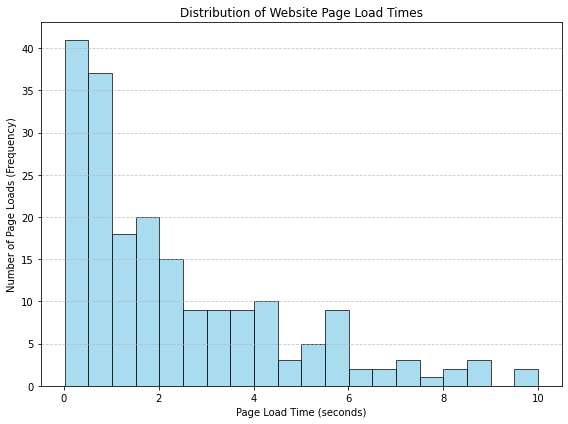

In [17]:

# 1. Simulate website page load time data (in seconds)
np.random.seed(42) # for reproducibility
average_load_time = 2.5  # seconds
std_dev_load_time = 1.0  # seconds
num_page_loads = 200

page_load_times = np.random.exponential(scale=average_load_time, size=num_page_loads) # Exponential distribution is often a good model for waiting times

# Clip to remove extremely long times that might skew the visualization but are rare in reality
page_load_times = np.clip(page_load_times, 0, 10) # Let's cap at 10 seconds for visualization purposes

# 2. Create the histogram using matplotlib
plt.figure(figsize=(8, 6))

plt.hist(page_load_times, bins=20, edgecolor='black', color='skyblue', alpha=0.7)

# 3. Add labels and title
plt.title('Distribution of Website Page Load Times')
plt.xlabel('Page Load Time (seconds)')
plt.ylabel('Number of Page Loads (Frequency)')

# 4. Add grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Show the histogram
plt.tight_layout()
plt.show()

Imagine you're running a business and you regularly collect customer satisfaction scores on a scale of 1 to 7 (where 1 is "very dissatisfied" and 7 is "very satisfied"). You've gathered hundreds of responses and want to understand how satisfied your customers are overall and what the distribution of satisfaction looks like. A histogram is a great way to visualize this.

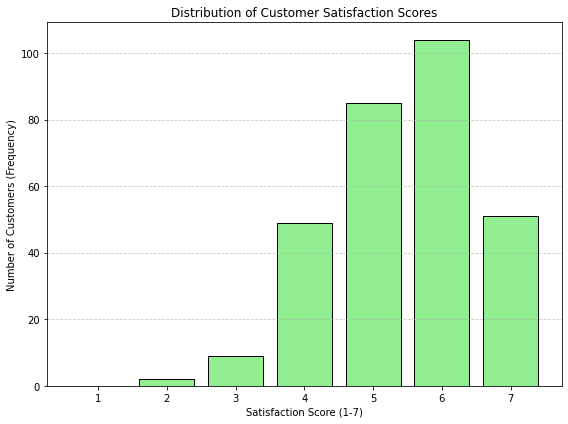

In [27]:

# 1. Simulate customer satisfaction score data (1-7 scale)
np.random.seed(42)
num_customers = 300

# Let's simulate scores with a slight positive skew, indicating generally good satisfaction
# but some lower scores as well.
satisfaction_scores = np.clip(np.round(np.random.normal(loc=5.5, scale=1.2, size=num_customers)), 1, 7)
satisfaction_scores = satisfaction_scores.astype(int) # Ensure scores are integers 1-7

# 2. Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(satisfaction_scores, bins=range(1, 9), align='left', rwidth=0.8, edgecolor='black', color='lightgreen') # Bins for each score 1 to 7

# 3. Add labels and title
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score (1-7)')
plt.ylabel('Number of Customers (Frequency)')
plt.xticks(range(1, 8)) # Ensure x-axis ticks are at each score value

# 4. Grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Show histogram
plt.tight_layout()
plt.show()

Imagine you are a financial analyst and you are interested in understanding the daily fluctuations of a particular stock's price. One way to analyze this is to look at the daily percentage returns. A daily return is calculated as:

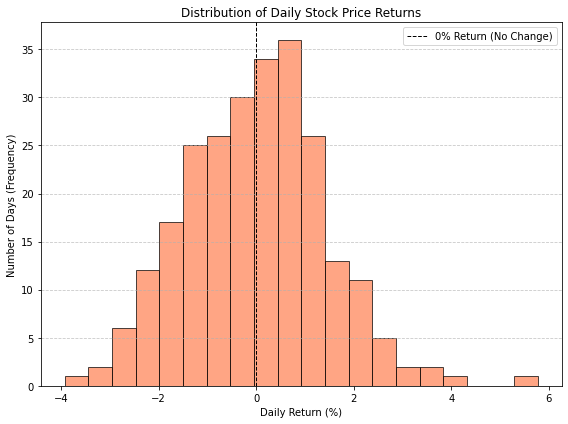

In [28]:
# 1. Simulate daily stock price returns (percentage)
np.random.seed(42)
num_days = 250  # Roughly a trading year

# Let's simulate returns that are roughly normally distributed around 0% (average day is neither big gain nor loss)
# with a standard deviation representing the stock's volatility.
average_daily_return = 0.0  # 0% average daily return
std_dev_daily_return = 1.5  # 1.5% standard deviation (volatility)

daily_returns = np.random.normal(loc=average_daily_return, scale=std_dev_daily_return, size=num_days)

# 2. Create the histogram of daily returns
plt.figure(figsize=(8, 6))
plt.hist(daily_returns, bins=20, edgecolor='black', color='coral', alpha=0.7) # Using coral color for financial context

# 3. Add labels and title
plt.title('Distribution of Daily Stock Price Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Number of Days (Frequency)')

# 4. Add a vertical line at 0% return for reference
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='0% Return (No Change)') # Mark zero return

# 5. Add grid and legend (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# 6. Show the histogram
plt.tight_layout()
plt.show()

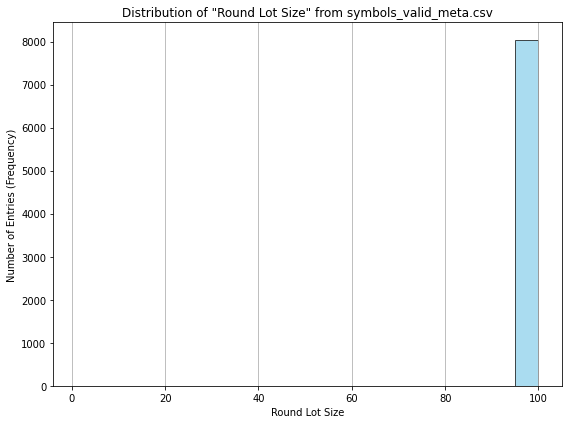

In [2]:

# 1. File name of your CSV file
csv_filename = 'symbols_valid_meta.csv'  # **CHANGE THIS IF YOUR FILE IS IN A DIFFERENT DIRECTORY**

# 2. Column name you want to visualize as a histogram
column_name_to_histogram = 'Round Lot Size' # **INITIAL GUESS - YOU MIGHT NEED TO CHANGE THIS TO A VALID COLUMN NAME FROM YOUR CSV**

# 3. Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"Error: File '{csv_filename}' not found. Make sure it's in the same directory as your script or provide the correct path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    exit()

# 4. Extract the column data (handling potential errors and non-numeric data)
data_series = df[column_name_to_histogram] # Select the column as a pandas Series

# Try to convert to numeric, coercing errors to NaN (Not a Number)
numeric_data = pd.to_numeric(data_series, errors='coerce')

# Remove NaN values (rows where conversion to number failed)
numeric_data = numeric_data.dropna()

# Check if we have any valid numerical data after cleaning
if numeric_data.empty:
    print(f"Error: No valid numerical data found in column '{column_name_to_histogram}'. Histogram cannot be created.")
    exit()

# 5. Create the histogram using pandas and matplotlib
plt.figure(figsize=(8, 6))
numeric_data.hist(bins=20, edgecolor='black', color='skyblue', alpha=0.7) # Directly call .hist() on the pandas Series

# 6. Add labels and title
plt.title(f'Distribution of "{column_name_to_histogram}" from {csv_filename}')
plt.xlabel(column_name_to_histogram)
plt.ylabel('Number of Entries (Frequency)')

# 7. Add grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 8. Show the histogram
plt.tight_layout()
plt.show()